# ProdigyInfoTech-DataScience-Task3

# 1.Task-3: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
# Here, the aim of my task 03 is to predict whether the client will subscribe (yes/no)to a term deposit, by building a classification model using Decision Tree.

In [4]:
%pip install seaborn 

In [5]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Loading dataset
df = pd.read_csv("bank_dataset.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


In [9]:
# Checking null values
df[df.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df_count = df.select_dtypes(include = 'number')
df_count

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [11]:
df_count.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Data Visualization

<AxesSubplot:xlabel='age', ylabel='count'>

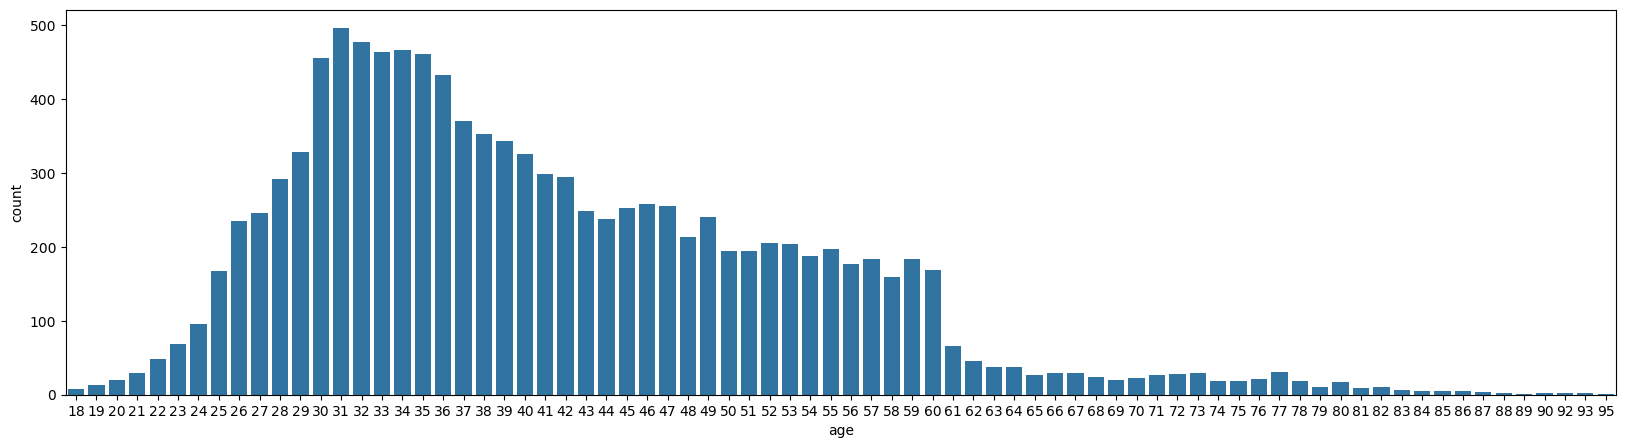

In [14]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'age', data = df)

<AxesSubplot:xlabel='duration'>

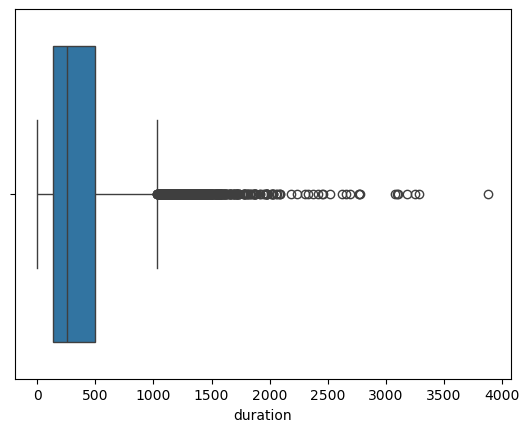

In [15]:
sns.boxplot(x=df["duration"])

<AxesSubplot:xlabel='age', ylabel='Density'>

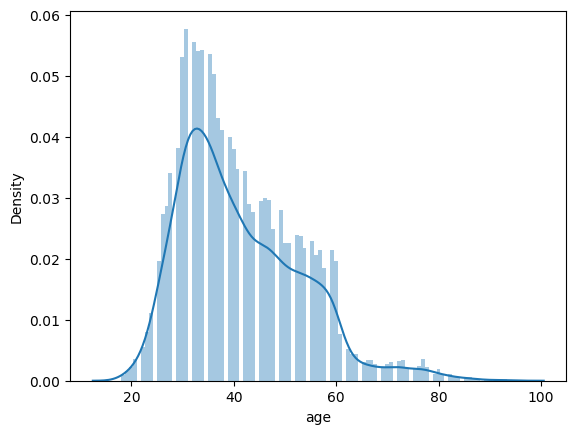

In [16]:
sns.distplot(df.age, bins=100)

<AxesSubplot:xlabel='duration', ylabel='Density'>

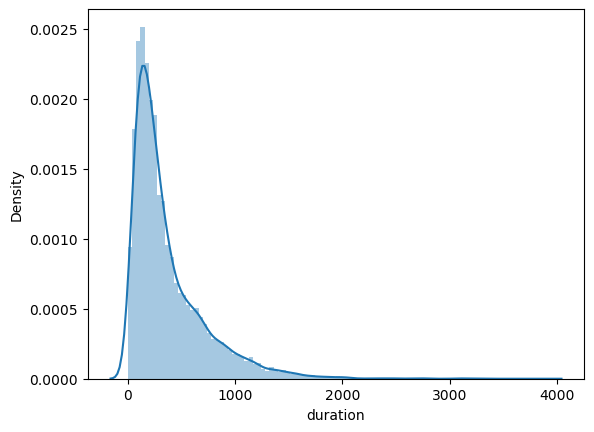

In [17]:
sns.distplot(df.duration, bins=100)

<AxesSubplot:xlabel='job', ylabel='count'>

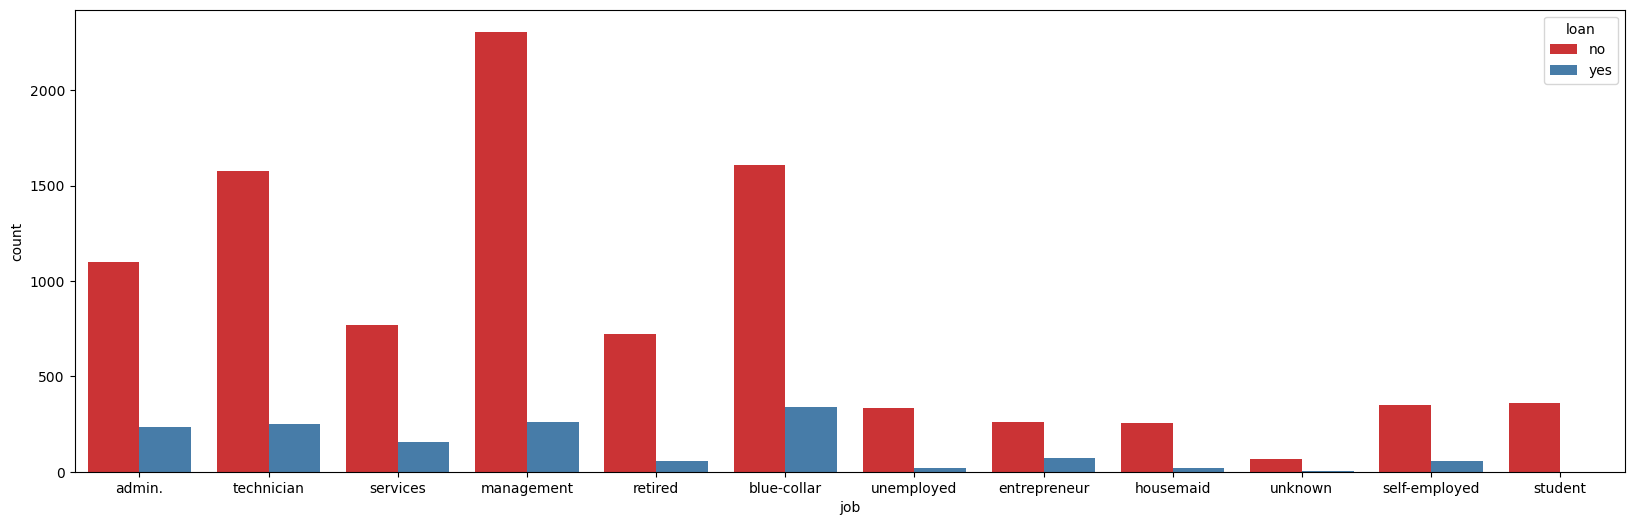

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x='job', data=df,hue='loan',palette='Set1')

<AxesSubplot:xlabel='job', ylabel='count'>

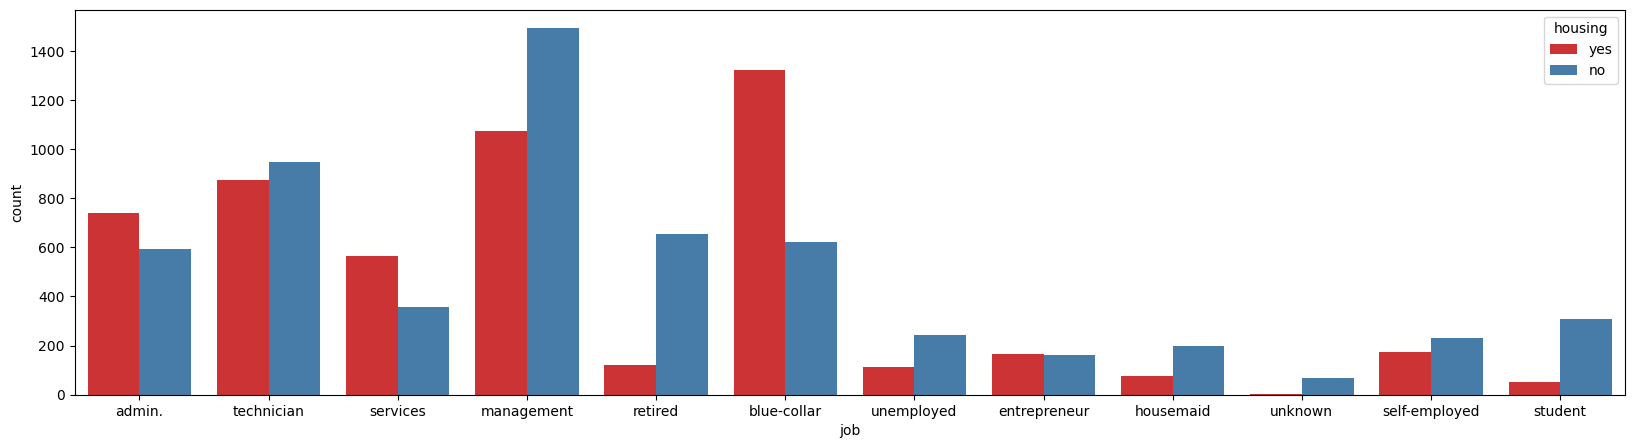

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='job', data=df,hue='housing',palette='Set1')

Text(0, 0.5, 'Deposit')

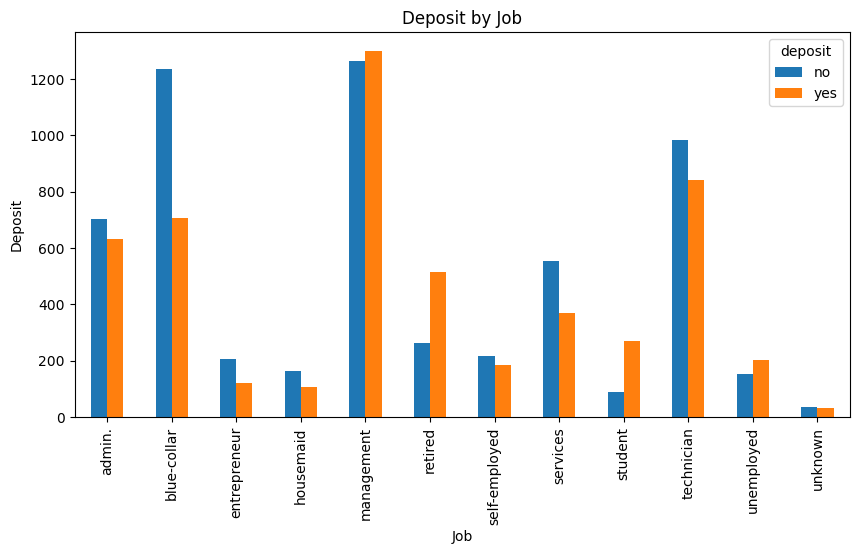

In [20]:
import matplotlib.pyplot as plt
df.groupby(["job"])['deposit'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("Deposit")

Text(0, 0.5, 'housing loan')

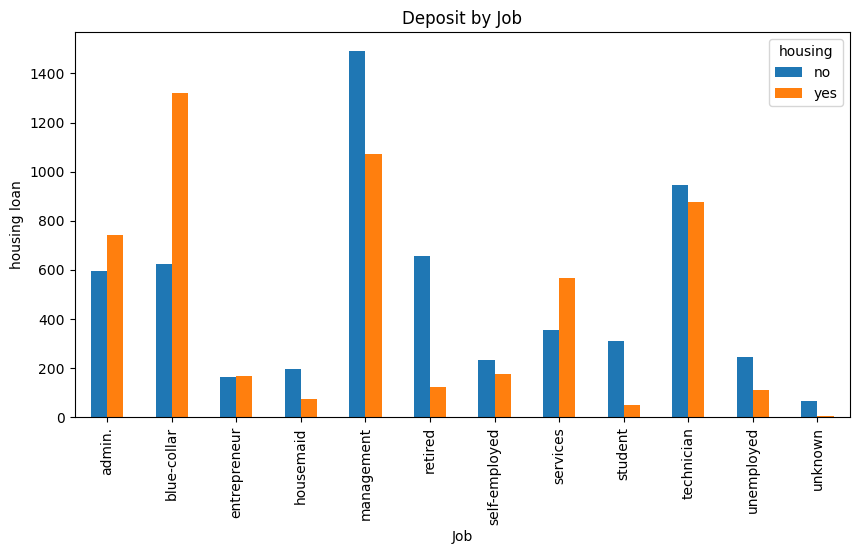

In [21]:
df.groupby(['job'])['housing'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("housing loan")

<AxesSubplot:title={'center':'Loan by Job'}, xlabel='job'>

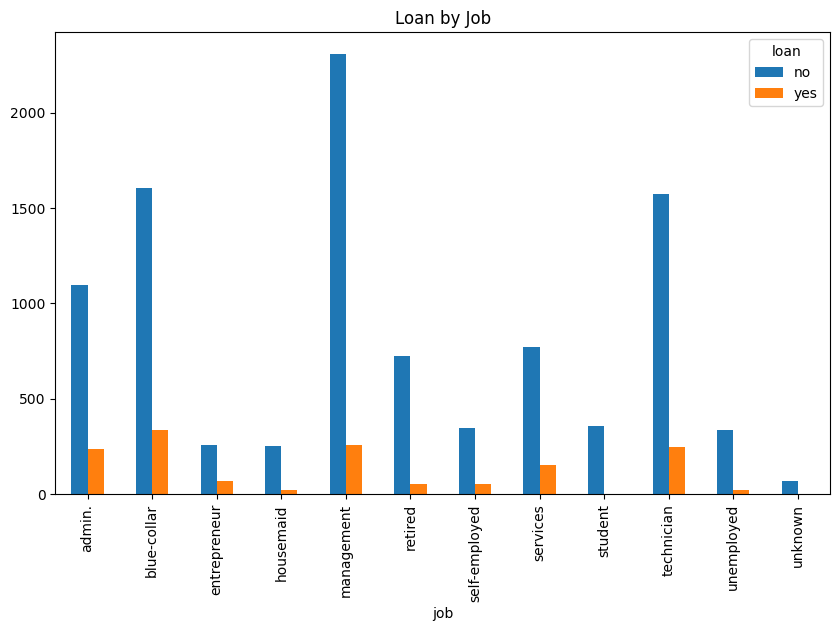

In [22]:
df.groupby(['job'])['loan'].value_counts().unstack().plot(kind='bar', figsize=(10, 6), title='Loan by Job')

<AxesSubplot:xlabel='job'>

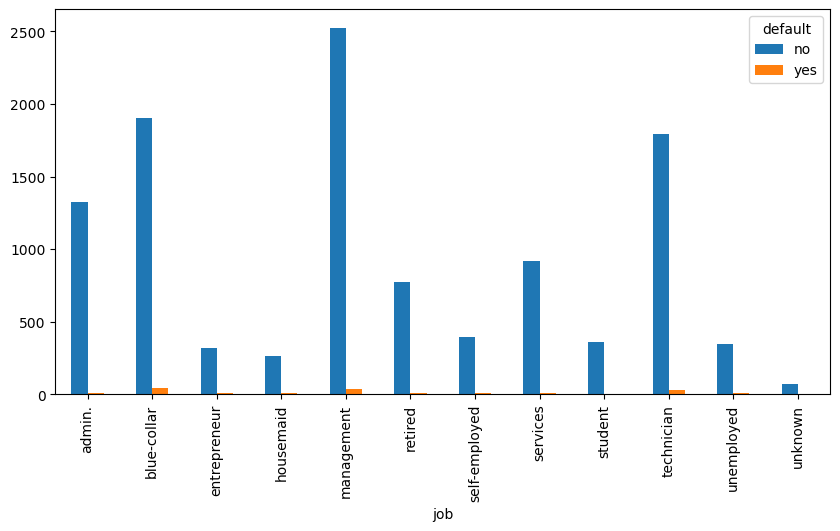

In [23]:
df.groupby(['job'])['default'].value_counts().unstack().plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='marital', ylabel='count'>

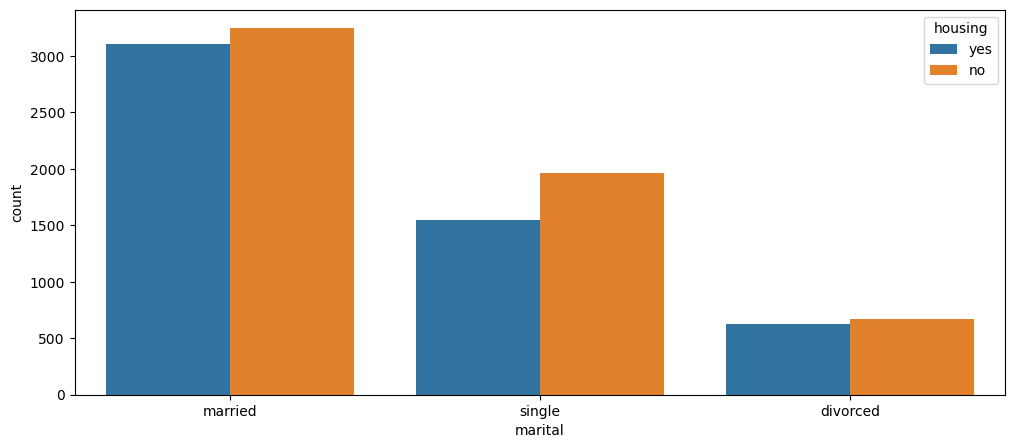

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x='marital', data=df, hue='housing')

## Convert Categorical data

In [25]:
# Copy for parsing
df_data = df.copy()

In [26]:
# People (deposit Vs Job category)
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student','unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
     print("{:15} : {:5}". format(j, len(df_data[(df_data.deposit == "yes") & (df_data.job ==j)])))


management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [27]:
# Different job categories
df_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [28]:
# Encoding
#Combine similar jobs into categiroes

df_data['job'] = df_data['job'].replace(['management', 'admin.'],'white-collar')
df_data['job'] = df_data['job'].replace(['services','housemaid'],'pink-collar')
df_data['job'] = df_data['job'].replace(['retired', 'student','unemployed', 'unknown'], 'other')

In [29]:
df_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [30]:
# Unique values
df_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [31]:
# Dropping 'contact' column
df_data.drop('contact', axis=1, inplace=True)

In [32]:
#Combining 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
df_data['poutcome'] = df_data['poutcome'].replace(['other'] , 'unknown')
df_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [33]:
# Values for "Housing" : yes/no
df_data["housing_cat"] = df_data['housing'].map({'yes':1, 'no':0})
df_data.drop('housing', axis=1, inplace=True)

In [34]:
# Values for "loan" : yes/no
df_data["loan_cat"] = df_data['loan'].map({'yes':1, 'no':0})
df_data.drop('loan', axis=1, inplace=True)

In [36]:
# Values for "default" : yes/no
df_data["default"]
df_data['default_cat'] = df_data['default'].map( {'yes':1, 'no':0} )
df_data.drop('default', axis=1,inplace = True)

In [37]:
#Values for "deposit" : yes/no
df_data["deposit_cat"] = df_data['deposit'].map({'yes':1, 'no':0})
df_data.drop('deposit', axis=1, inplace=True)

In [38]:
#Dropping 'month' and 'day'
df_data.drop('month', axis=1, inplace=True)  #last contact day of the month
df_data.drop('day', axis=1, inplace=True)    #: last contact month of year

In [39]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
# -1 means client was not previously contacted
print("Customers that have not been contacted before:", len(df_data[df_data.pdays==-1]))
print("Maximum values on pdays :", df_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on pdays : 854


In [40]:
#Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
df_data.loc[df_data['pdays'] == -1, 'pdays'] = 10000

In [41]:
#Creating a new column: recent_pdays
df_data['recent_pdays'] = np.where(df_data['pdays'], 1/df_data.pdays, 1/df_data.pdays)

In [42]:
#Dropping 'pdays'
df_data.drop('pdays', axis=1, inplace = True)

In [43]:
df_data.head()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,housing_cat,loan_cat,default_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,1,0,0,1,0.0001
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.0001
2,41,technician,married,secondary,1270,1389,1,0,unknown,1,0,0,1,0.0001
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,1,0,0,1,0.0001
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,0,0,1,0.0001


In [44]:
df_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,housing_cat,loan_cat,default_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,1,0,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,1,0,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


In [45]:
# Converting categorical variables to dummies
df_dummies = pd.get_dummies(data=df_data, columns = ['job', 'marital','education', 'poutcome'],prefix = ['job', 'marital', 'education','poutcome'])
df_dummies.head()

,age,balance,duration,campaign,previous,housing_cat,loan_cat,default_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,1,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,1,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,1,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1


In [46]:
df_dummies.describe()

,age,balance,duration,campaign,previous,housing_cat,loan_cat,default_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.473123,0.130801,0.015051,0.473840,0.003124,...,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.499299,0.337198,0.121761,0.499338,0.030686,...,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.001919,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df_dummies.shape

(11162, 27)

## Whole Population Observation 

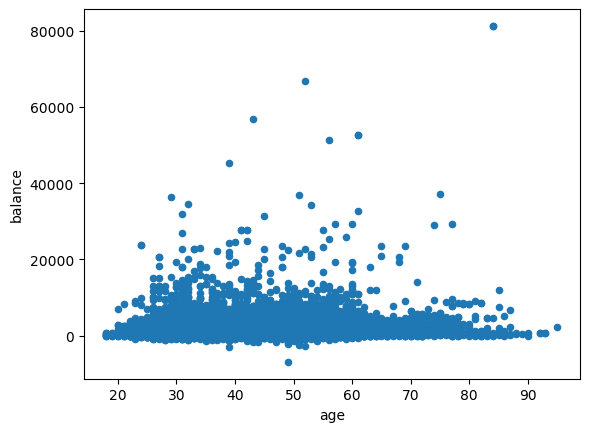

In [49]:
df_dummies.plot(kind='scatter', x='age', y='balance');

Across all ages people majority of people have savings less than 20000.

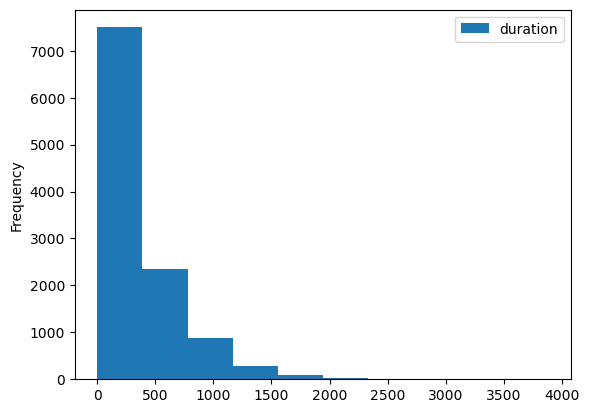

In [50]:
df_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [51]:
# People who sign up to a term deposite
df_dummies[df_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,housing_cat,loan_cat,default_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.365854,0.091511,0.009832,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.481714,0.288361,0.098676,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# People who signed up to a term deposite having a personal loan(loan_cat) and housing loan(housing_cat)
len(df_dummies[(df_dummies.deposit_cat == 1) & (df_dummies.loan_cat) & (df_dummies.housing_cat)])

265

In [53]:
# People who signed up to a term deposite with a credit default
len(df_dummies[(df_dummies.deposit_cat == 1) & (df_dummies.default_cat ==1)])

52

<AxesSubplot:xlabel='job', ylabel='deposit_cat'>

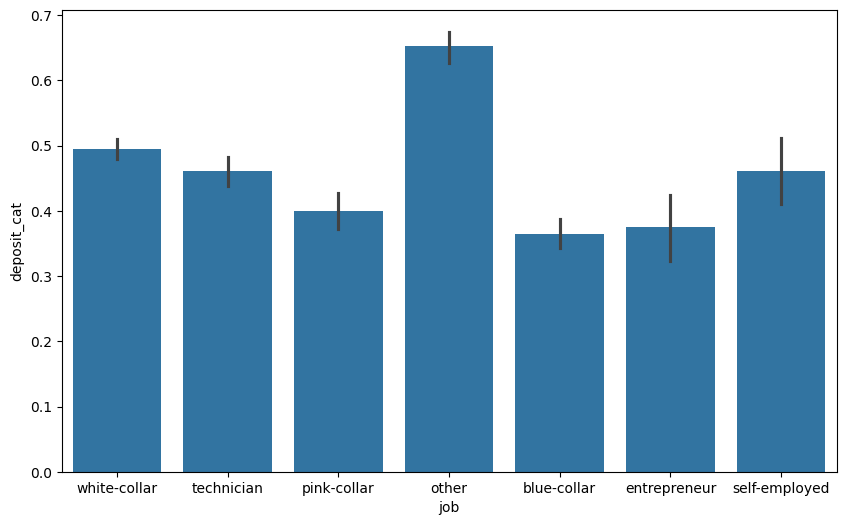

In [54]:
# Job vs deposit
plt.figure(figsize= (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = df_data)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

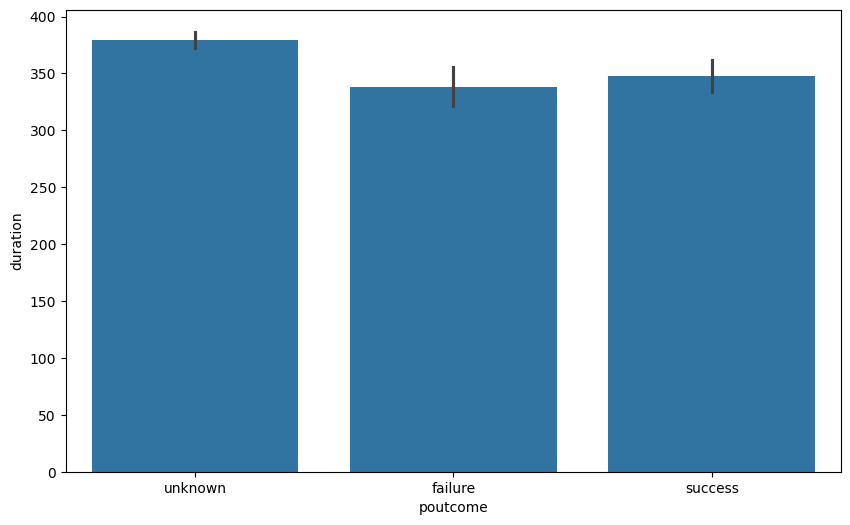

In [55]:
# "previous outcome" Vs "call duration"
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = df_data)

## Classifications

In [56]:
# Coppying dummy column
df1 = df_dummies.copy()

In [57]:
corr = df1.corr()
corr

,age,balance,duration,campaign,previous,housing_cat,loan_cat,default_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.168700,-0.031418,-0.011425,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.077092,-0.084589,-0.060954,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,0.035051,-0.001914,-0.009760,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.006660,0.034722,0.030975,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.000840,-0.022668,-0.035273,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,1.000000,0.076761,0.011076,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076761,1.000000,0.076434,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,0.011076,0.076434,1.000000,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.203888,-0.110580,-0.040680,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.029350,-0.012697,-0.011290,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Correlation Matrix')

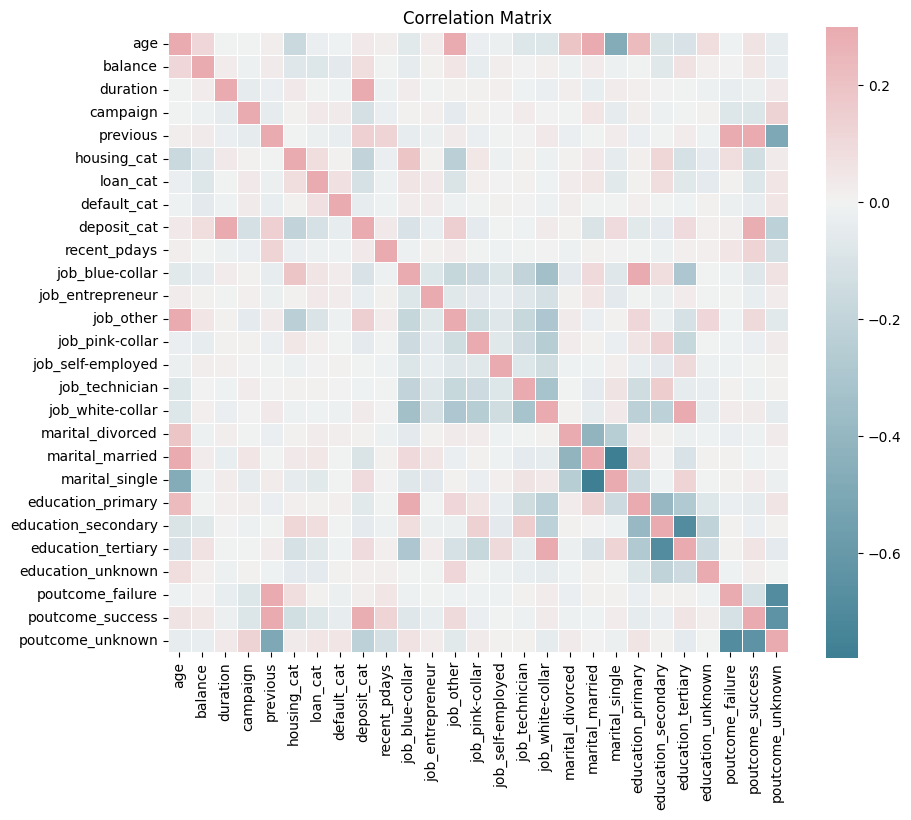

In [58]:
# Heatmap of Correlation Matrix
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5,cbar_kws={"shrink": .82})
plt.title('Correlation Matrix')

In [59]:
#Extracting the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


## Building Data Model

In [60]:
#Train-Test split: 20% test data
drop_deposit_data = df1.drop('deposit_cat', axis=1)    #axis=1 uding to drop the column
label = df1.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(drop_deposit_data, label, test_size=0.2, random_state=50)

In [61]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [62]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [63]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)


Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [64]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7801164352888491


In [74]:
#Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7371249440214958


## Various tree depth used for Comparing Training and Testing scores 

In [75]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7801164352888491
max                     1.0   0.7371249440214958


In [76]:
 #Generating the decision tree for depth = 2
#Creating a feature vector
features = df1.columns.tolist()
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'housing_cat',
 'loan_cat',
 'default_cat',
 'deposit_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [77]:
# Two classes: 0 = not signed up, 1 = signed up
dt2.classes_

array([0, 1], dtype=int64)

In [78]:
#Creating a feature vector
features = drop_deposit_data.columns.tolist()
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'housing_cat',
 'loan_cat',
 'default_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [79]:
#Investigating most important features with depth =2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

#Fitting the decision tree classifier
dt2.fit(data_train, label_train)
fi = dt2.feature_importances_
l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
previous............ 0.0
housing_cat......... 0.0
loan_cat............ 0.0
default_cat......... 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


## Prediction

In [80]:
#According to feature importance results, the most important feature is "Duration"
#Calculating statistics on duration

print("Mean duration : ", drop_deposit_data.duration.mean())
print("Maximum duration: ", drop_deposit_data.duration.max())
print("Minimum duration: ", drop_deposit_data.duration.min())

Mean duration :  371.99381831213043
Maximum duration:  3881
Minimum duration:  2


In [81]:
# Predict: Successful deposite with a call duration = 371 sec
print(dt2.predict_proba(np.array([0, 0, 371, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.48515568 0.51484432]]
[1]


In [82]:
# Predict: Successful deposite with a maximun call duration = 3881 sec
print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[1]


In [83]:
#A row with poutcome_success = 1
drop_deposit_data.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
housing_cat               1.000000
loan_cat                  0.000000
default_cat               0.000000
recent_pdays              0.005747
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
poutcome_failure          0.000000
poutcome_success          1.000000
poutcome_unknown          0.000000
Name: 985, dtype: float64

In [84]:
# Predict: Probability for above
print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]


In [85]:
# Making predictions on the test set
preds = dt2.predict(data_test)

#Calculating accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

#Making predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

#Calculating the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))



Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609
